In [86]:
"""
this script contains functions to visualize the different attributes
Author: Nathan Greffe
"""
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pickle
import pandas as pd
import numpy as np

TO_PLOT = 'NetAdapt_variations'

In [69]:
results = pd.read_csv('NetAdapt_variations.csv')
results['table_time'] = results['table_time'] * 1000
results['measured_time'] = results['measured_time'] * 1000
results_NA['method'] = results.method.astype('category')
results_NA['group'] = results.group.astype('category')

results.head()

,file_name,no_fine_tune,fine_tune,retrain_scratch,table_time,measured_time,method,group
0,res-40-2-l2_pruned-pf=0.4-dr=0.98,6.58,5.89,5.37,209.9,207.7,NetAdapt,l2
1,res-40-2-l2_pruned-pf=0.4-dr=0.98-2,6.11,6.02,5.56,210.5,207.7,NetAdapt,l2
2,res-40-2-l2_pruned-pf=0.4-dr=0.98-3,6.10,5.91,5.33,210.8,210.1,NetAdapt,l2
3,res-40-2-fisher_pruned-pf=0.4-dr=0.98,6.27,5.89,5.53,208.0,207.1,NetAdapt,fisher
4,res-40-2-fisher_pruned-pf=0.4-dr=0.98-2,6.25,6.04,5.27,211.3,209.5,NetAdapt,fisher


0.9995826143506163

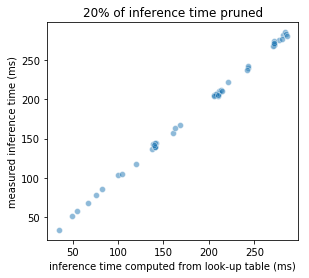

In [70]:
results_table_time = results[results.table_time.notna()]
fig, ax = plt.subplots(1, figsize=(4.5, 4))
sns.scatterplot(x="table_time", y="measured_time", data=results_table_time, alpha=.5, ax=ax)
ax.set_title('20% of inference time pruned')
ax.set_xlabel('inference time computed from look-up table (ms)')
ax.set_ylabel('measured inference time (ms)')

results_table_time['table_time'].corr(results_table_time['measured_time'])

In [82]:
group_2 = ['res-40-2-l2_pruned-pf=0.2-dr=0.98',
             'res-40-2-l2_pruned-pf=0.2-dr=0.98-2',
             'res-40-2-l2_pruned-pf=0.2-dr=0.98-3',
             'res-40-2-fisher_pruned-pf=0.2-dr=0.98',
             'res-40-2-fisher_pruned-pf=0.2-dr=0.98-2',
             'res-40-2-fisher_pruned-pf=0.2-dr=0.98-3',
             'res-40-2-fisher_pruned-pf=0.2-dr=0.98-allow_small',
             'res-40-2-fisher_pruned-pf=0.2-dr=0.98-allow_small-2',
             'res-40-2-fisher_pruned-pf=0.2-dr=0.98-allow_small-3',
             'res-40-2-l2_pruned-pf=0.2-dr=0.98-allow_small',
             'res-40-2-l2_pruned-pf=0.2-dr=0.98-allow_small-2',
             'res-40-2-l2_pruned-pf=0.2-dr=0.98-allow_small-3',]
group_4 = ['res-40-2-l2_pruned-pf=0.4-dr=0.98',
             'res-40-2-l2_pruned-pf=0.4-dr=0.98-2',
             'res-40-2-l2_pruned-pf=0.4-dr=0.98-3',
             'res-40-2-fisher_pruned-pf=0.4-dr=0.98',
             'res-40-2-fisher_pruned-pf=0.4-dr=0.98-2',
             'res-40-2-fisher_pruned-pf=0.4-dr=0.98-3',
             'res-40-2-fisher_pruned-pf=0.4-dr=0.98-allow_small',
             'res-40-2-fisher_pruned-pf=0.4-dr=0.98-allow_small-2',
             'res-40-2-fisher_pruned-pf=0.4-dr=0.98-allow_small-3',
             'res-40-2-l2_pruned-pf=0.4-dr=0.98-allow_small',
             'res-40-2-l2_pruned-pf=0.4-dr=0.98-allow_small-2',
             'res-40-2-l2_pruned-pf=0.4-dr=0.98-allow_small-3',]
group_6 = ['res-40-2-l2_pruned-pf=0.6-dr=0.98-init_red_fact=30',
             'res-40-2-l2_pruned-pf=0.6-dr=0.98-init_red_fact=30-2',
             'res-40-2-l2_pruned-pf=0.6-dr=0.98-init_red_fact=30-3',
             'res-40-2-fisher_pruned-pf=0.6-dr=0.98-init_red_fact=30',
             'res-40-2-fisher_pruned-pf=0.6-dr=0.98-init_red_fact=30-2',
             'res-40-2-fisher_pruned-pf=0.6-dr=0.98-init_red_fact=30-3',
             'res-40-2-fisher_pruned-pf=0.6-dr=0.98-allow_small-init_red_fact=30',
             'res-40-2-fisher_pruned-pf=0.6-dr=0.98-allow_small-init_red_fact=30-2',
             'res-40-2-fisher_pruned-pf=0.6-dr=0.98-allow_small-init_red_fact=30-3',
             'res-40-2-l2_pruned-pf=0.6-dr=0.98-allow_small-init_red_fact=30',
             'res-40-2-l2_pruned-pf=0.6-dr=0.98-allow_small-init_red_fact=30-2',
             'res-40-2-l2_pruned-pf=0.6-dr=0.98-allow_small-init_red_fact=30-3',]

results_NA = results[results['method'] == 'NetAdapt']

results_NA_02 = results_NA[results_NA.file_name.apply(lambda x: x in group_2)]
results_NA_04 = results_NA[results_NA.file_name.apply(lambda x: x in group_4)]
results_NA_06 = results_NA[results_NA.file_name.apply(lambda x: x in group_6)]

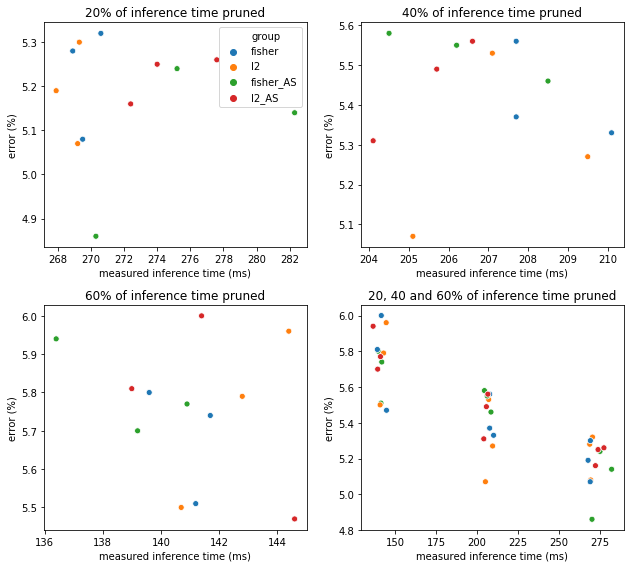

In [83]:
fig, ax = plt.subplots(2, 2, figsize=(9, 8))
sns.scatterplot(x="measured_time", y="retrain_scratch", data=results_NA_02, hue='group', 
                legend='brief', ax=ax[0, 0])
ax[0, 0].set_title('20% of inference time pruned')
ax[0, 0].set_xlabel('measured inference time (ms)')
ax[0, 0].set_ylabel('error (%)')
sns.scatterplot(x="measured_time", y="retrain_scratch", data=results_NA_04, hue='group', 
                legend=False, ax=ax[0, 1])
ax[0, 1].set_title('40% of inference time pruned')
ax[0, 1].set_xlabel('measured inference time (ms)')
ax[0, 1].set_ylabel('error (%)')
sns.scatterplot(x="measured_time", y="retrain_scratch", data=results_NA_06, hue='group', 
                legend=False, ax=ax[1, 0])
ax[1, 0].set_title('60% of inference time pruned')
ax[1, 0].set_xlabel('measured inference time (ms)')
ax[1, 0].set_ylabel('error (%)')
sns.scatterplot(x="measured_time", y="retrain_scratch", data=results_NA, hue='group', 
                legend=False, ax=ax[1, 1])
ax[1, 1].set_title('20, 40 and 60% of inference time pruned')
ax[1, 1].set_xlabel('measured inference time (ms)')
ax[1, 1].set_ylabel('error (%)')
plt.tight_layout()  # so as to avoid overlaps
plt.show()

In [73]:
if False:
    plt.savefig("fisher_l2_allow_small.pdf")

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'error (%)')

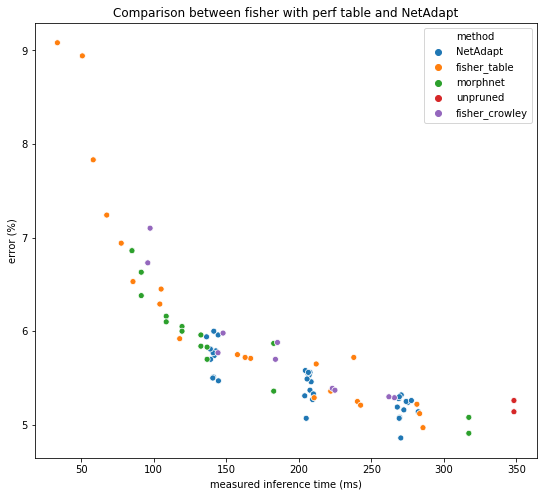

In [74]:
fig, ax = plt.subplots(1, figsize=(9, 8))
sns.scatterplot(x="measured_time", y="retrain_scratch", data=results, hue='method', 
                legend='brief', ax=ax)
ax.set_title('Comparison between fisher with perf table and NetAdapt')
ax.set_xlabel('measured inference time (ms)')
ax.set_ylabel('error (%)')

In [98]:
def plot_channels_left(files_names, net='res-40-2', save_name=None):
    """
    THIS FUNCTIONS NEEDS PYTHON >3.6 TO WORK PROPERLY (dictionnaries iteration order)
    plots, for each block, the number of middle channels left and the proportion of channels left w.r.t. the initial
    number of channels, display strided layers in red and "shared" layers in green
    :param files_names: list of pickle file names containing the number of channels for each layers as a dict
    :param net: the name of the pruned network
    :param save_name: if not None, saves the plot into a file named save_name
    """
    nbr_channels_dicts = []
    for file_name in files_names:
        with open(file_name, 'rb') as file:
            nbr_channels_dicts.append(pickle.load(file))
    all_nbr_channels_left = []
    all_prop_channels_left = []
    colors = []
    if net =='res-40-2':
        init_nbr_channels_color = {"Conv_0": (16, 'C0'), "Conv_1_0_1": (32, 'C0'), "Skip_1": (32, 'C2'), 
            "Conv_1_1_1": (32, 'C0'), "Conv_1_2_1": (32, 'C0'), "Conv_1_3_1": (32, 'C0'),
            "Conv_1_4_1": (32, 'C0'), "Conv_1_5_1": (32, 'C0'), "Conv_2_0_1": (64, 'C3'), 
            "Skip_2": (64, 'C2'), "Conv_2_1_1": (64, 'C0'), "Conv_2_2_1": (64, 'C0'), 
            "Conv_2_3_1": (64, 'C0'), "Conv_2_4_1": (64, 'C0'), "Conv_2_5_1": (64, 'C0'), 
            "Conv_3_0_1": (128, 'C3'), "Skip_3": (128, 'C2'), 
            "Conv_3_1_1": (128, 'C0'), "Conv_3_2_1": (128, 'C0'), "Conv_3_3_1": (128, 'C0'),
            "Conv_3_4_1": (128, 'C0'), "Conv_3_5_1": (128, 'C0')}
        for i, nbr_channels_dict in enumerate(nbr_channels_dicts):
            nbr_channels_left = []
            prop_channels_left = []
            for key, value in init_nbr_channels_color.items():
                nbr_channels_left.append(nbr_channels_dict[key])
                prop_channels_left.append(nbr_channels_left[-1] / value[0])
                if i == 1:
                    colors.append(value[1])
            all_nbr_channels_left.append(nbr_channels_left)
            all_prop_channels_left.append(prop_channels_left)
    else:
        raise ValueError("Unknown Network")
        
    # transform the lists in numpy array to ease averaging
    nbr_channels_left = np.array(all_nbr_channels_left)
    nbr_channels_left_mean = np.mean(nbr_channels_left, 0)
    nbr_channels_left_err = [nbr_channels_left_mean - np.min(nbr_channels_left, 0),
                             np.max(nbr_channels_left, 0) - nbr_channels_left_mean]

    prop_channels_left = np.array(all_prop_channels_left)
    prop_channels_left_mean = np.mean(prop_channels_left, 0)
    prop_channels_left_err = [prop_channels_left_mean - np.min(prop_channels_left, 0),
                              np.max(prop_channels_left, 0) - prop_channels_left_mean]

    offset_layer = [i for i in range(1, nbr_channels_left.shape[1] + 1)]
    x_ticks = [i for i in range(1, nbr_channels_left.shape[1] + 1, 2)]
    
    # plot
    fig, ax = plt.subplots(2, 1)
    ax[0].set_title('Number of channels left for "each" layer')
    ax[0].set_xlabel('layer offset')
    ax[0].set_ylabel('number of channels left')
    ax[0].set_xticks(x_ticks)
    ax[0].bar(x=offset_layer, height=nbr_channels_left_mean, yerr=nbr_channels_left_err, color=colors)
    ax[1].set_title('Proportion of channels left for "each" layer')
    ax[1].set_xlabel('layer offset')
    ax[1].set_ylabel('proportion of channels left')
    ax[1].set_xticks(x_ticks)
    ax[1].bar(x=offset_layer, height=prop_channels_left_mean, yerr=prop_channels_left_err, color=colors)
    plt.tight_layout()  # so as to avoid overlaps
    if save_name is not None:
        plt.savefig(f"{save_name}.pdf")
    plt.show()

['C0', 'C0', 'C2', 'C0', 'C0', 'C0', 'C0', 'C0', 'C3', 'C2', 'C0', 'C0', 'C0', 'C0', 'C0', 'C3', 'C2', 'C0', 'C0', 'C0', 'C0', 'C0']


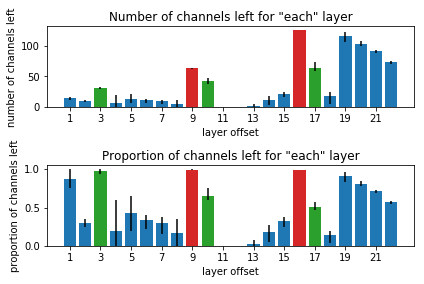

In [99]:
files_names = ['res-40-2-table_fisher-pf=0.8-750ch', 'res-40-2-table_fisher-pf=0.8-2-750ch', 
               'res-40-2-table_fisher-pf=0.8-3-750ch']
files_names = [os.path.join('nbr_channels', file_name) + '.pickle' for file_name in files_names]
plot_channels_left(files_names, net='res-40-2', save_name=None)

['C0', 'C0', 'C2', 'C0', 'C0', 'C0', 'C0', 'C0', 'C3', 'C2', 'C0', 'C0', 'C0', 'C0', 'C0', 'C3', 'C2', 'C0', 'C0', 'C0', 'C0', 'C0']


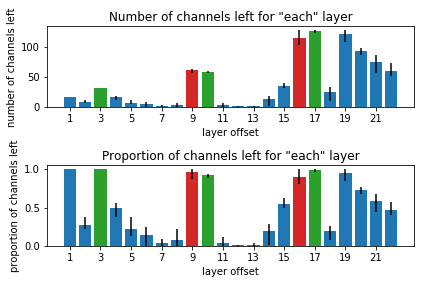

In [101]:
files_names = ['res-40-2-fisher_pruned-pf=0.6-dr=0.98-allow_small-init_red_fact=30', 
               'res-40-2-fisher_pruned-pf=0.6-dr=0.98-allow_small-init_red_fact=30-2', 
               'res-40-2-fisher_pruned-pf=0.6-dr=0.98-allow_small-init_red_fact=30-3']
files_names = [os.path.join('nbr_channels', file_name) for file_name in files_names]
plot_channels_left(files_names, net='res-40-2', save_name=None)